In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.optimizers import Adam 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


In [36]:
df = pd.read_csv("cleaned_data_kurs_20142023.csv")
df.head(10)

,no,nilai,jual,beli,tanggal
0,1,1,15493,15339,12/29/2023
1,2,1,15491,15337,12/28/2023
2,3,1,15566,15412,12/27/2023
3,4,1,15611,15455,12/22/2023
4,5,1,15590,15434,12/21/2023
5,6,1,15584,15428,12/20/2023
6,7,1,15594,15438,12/19/2023
7,8,1,15581,15425,12/18/2023
8,9,1,15570,15416,12/15/2023
9,10,1,15707,15551,12/14/2023


In [37]:
df.isnull().sum()

no         0
nilai      0
jual       0
beli       0
tanggal    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       2456 non-null   int64 
 1   nilai    2456 non-null   int64 
 2   jual     2456 non-null   int64 
 3   beli     2456 non-null   int64 
 4   tanggal  2456 non-null   object
dtypes: int64(4), object(1)
memory usage: 96.1+ KB


In [39]:
df['mean_kurs'] = df[['jual', 'beli']].mean(axis=1).astype(float)
df

,no,nilai,jual,beli,tanggal,mean_kurs
0,1,1,15493,15339,12/29/2023,15416.0
1,2,1,15491,15337,12/28/2023,15414.0
2,3,1,15566,15412,12/27/2023,15489.0
3,4,1,15611,15455,12/22/2023,15533.0
4,5,1,15590,15434,12/21/2023,15512.0
...,...,...,...,...,...,...
2451,2452,1,12290,12168,1/8/2014,12229.0
2452,2453,1,12323,12201,1/7/2014,12262.0
2453,2454,1,12291,12169,1/6/2014,12230.0
2454,2455,1,12287,12165,1/3/2014,12226.0


In [40]:
df.drop(columns=['no','jual','beli','tanggal', 'nilai'], inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mean_kurs  2456 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [42]:
df.shape

(2456, 1)

In [43]:
test_split=round(len(df)*0.20)
df_for_training=df[:1961]
df_for_testing=df[1961:]
print(df_for_training.shape)
print(df_for_testing.shape)

(1961, 1)
(495, 1)


In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.65268676],
       [0.65216252],
       [0.67182176],
       ...,
       [0.24927916],
       [0.24508519],
       [0.23826999]])

In [45]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
timestep = 30
x_train, y_train = createXY(df_for_training_scaled, timestep)
x_test, y_test = createXY(df_for_testing_scaled, timestep)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1931, 30, 1)
(1931,)
(465, 30, 1)
(465,)


In [46]:
# def df_to_x_y(df, window_size=5):
#     df_as_np = df.to_numpy()
#     x=[]
#     y=[]
#     for i in range(len(df_as_np)-window_size):
#         row = [[a] for a in df_as_np[i:i+window_size]]
#         x.append(row)
#         label = df_as_np[i+window_size]
#         y.append(label)
#     return np.array(x), np.array(y)

# timestep = 30
# x, y = df_to_x_y(df, timestep)
# print(x.shape, y.shape)    

In [47]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [48]:
# ss=StandardScaler()
# x_train_2d = x_train.reshape(-1, x_train.shape[-1])
# x_test_2d = x_test.reshape(-1, x_test.shape[-1])

# x_train_scaled = ss.fit_transform(x_train_2d)
# x_test_scaled = ss.transform(x_test_2d)

# x_train = x_train_scaled.reshape(x_train.shape)
# x_test = x_test_scaled.reshape(x_test.shape)

# y_train = np.log(y_train)
# y_test = np.log(y_test)

In [49]:
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# def bilstm_build():
#     bilstm = Sequential()
#     bilstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 1)))
#     bilstm.add(Bidirectional(LSTM(64, return_sequences=True)))
#     bilstm.add(Dense(8, 'relu'))
#     bilstm.add(Dense(1, 'linear'))
#     bilstm.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
#     return bilstm

# bilstm = KerasRegressor(model=bilstm_build, verbose=2, validation_split=0.1)
# params = {'batch_size': [32,64], 'epochs': [50,100]}

# model_search = GridSearchCV(estimator = bilstm, param_grid = params, cv=2)


In [50]:
# model_search = model_search.fit(x_train,y_train)

In [51]:
# best_params = model_search.best_params_

# batch_size = best_params['batch_size']
# epochs = best_params['epochs']

# print("Batch size terbaik:", batch_size)
# print("Epochs terbaik:", epochs)

In [52]:
# mymodel = model_search.best_estimator_
# mymodel

In [53]:
# pred = mymodel.predict(x_test)
# original = y_test
# print(pred.shape)
# print(original.shape)

In [54]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(30, 1)))
model1.add(Bidirectional(LSTM(32, return_sequences=False)))
model1.add(Dropout(0.2))
model1.add(Dense(1, 'linear'))
model1.summary()

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
history = model1.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

loss, rmse = model1.evaluate(x_test, y_test, verbose=1)

print("Loss:", loss)
print("RMSE:", rmse)

c:\Users\LOQ\Documents\Coding\belajar-bilstm\bilstmvenv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 30, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,073 (293.25 KB)

 Trainable params: 75,073 (293.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0629 - root_mean_squared_error: 0.2411 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - root_mean_squared_error: 0.0769 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1180
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0959
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - root_mean_squared_error: 0.0587 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0911
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/s

In [ ]:
prediction = (model1.predict(x_test)).reshape(-1)
original = y_test

print(prediction.shape)
print(original.shape)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
(465,)
(465,)


In [56]:
train_result = pd.DataFrame(data={'Prediction':prediction, 'Actual':original})
train_result

,Prediction,Actual
0,0.236124,0.208912
1,0.231660,0.201835
2,0.226908,0.213106
3,0.223792,0.225688
4,0.222584,0.219397
...,...,...
460,-0.183631,-0.182700
461,-0.181187,-0.174050
462,-0.178004,-0.182438
463,-0.175623,-0.183486


[]

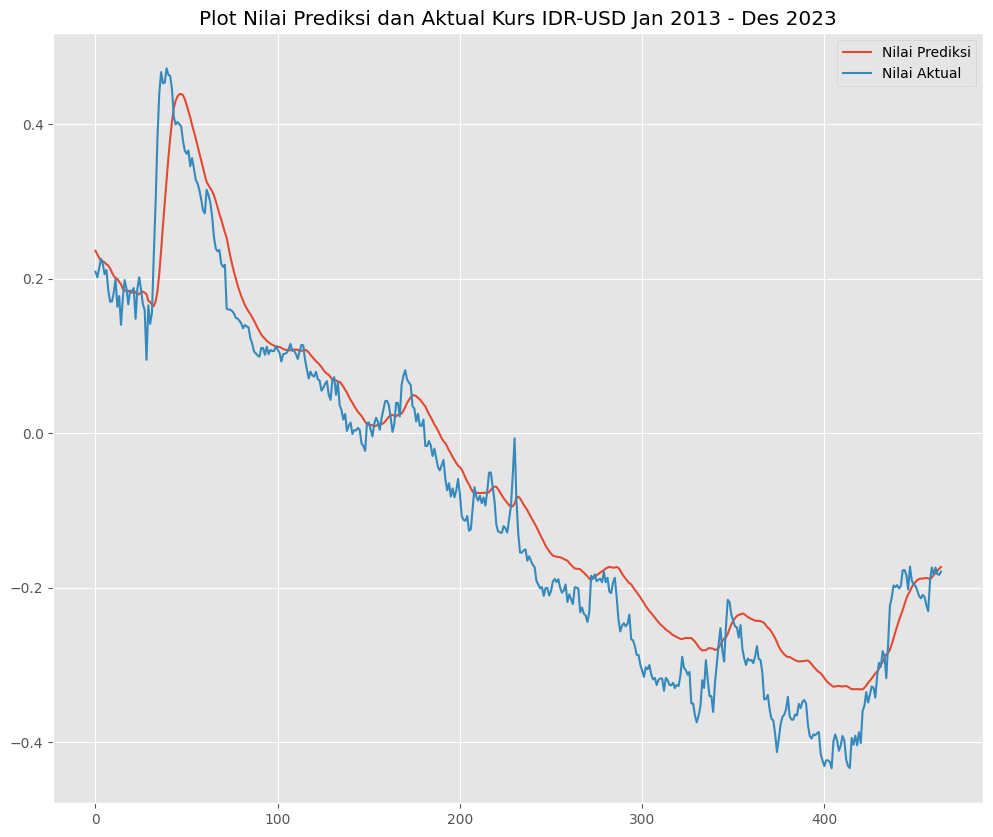

In [57]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 10))
plt.plot((train_result['Prediction']), label='Nilai Prediksi')
plt.plot((train_result['Actual']), label='Nilai Aktual')
plt.legend()
plt.title('Plot Nilai Prediksi dan Aktual Kurs IDR-USD Jan 2013 - Des 2023')
plt.plot()

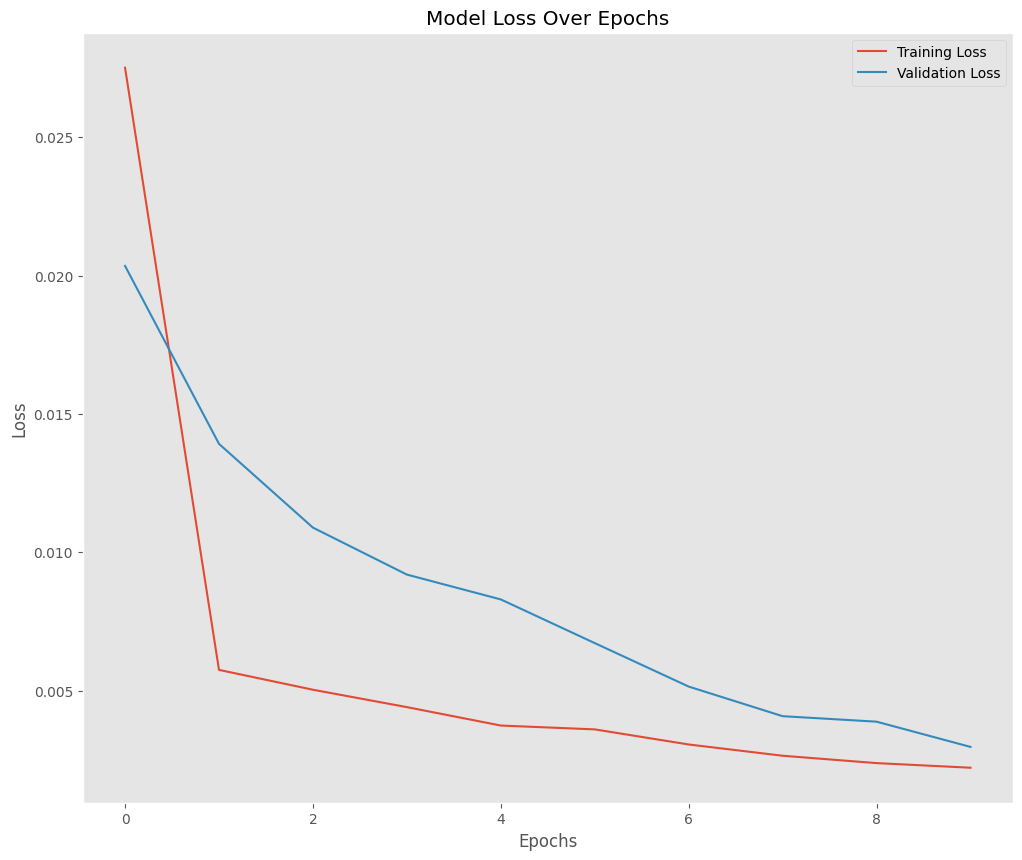

In [59]:
history_df = pd.DataFrame(history.history)

plt.style.use("ggplot")

plt.figure(figsize=(12, 10))

plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

# Show the plot
plt.show()